In [1]:
%load_ext watermark
%watermark

2020-09-12T20:15:06-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

## Lectura de datos

In [4]:
vehiculos = pd.read_pickle("vehiculos.3.variables_agrupadas.pkl")
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo          object
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

## Distribución de variables numericas

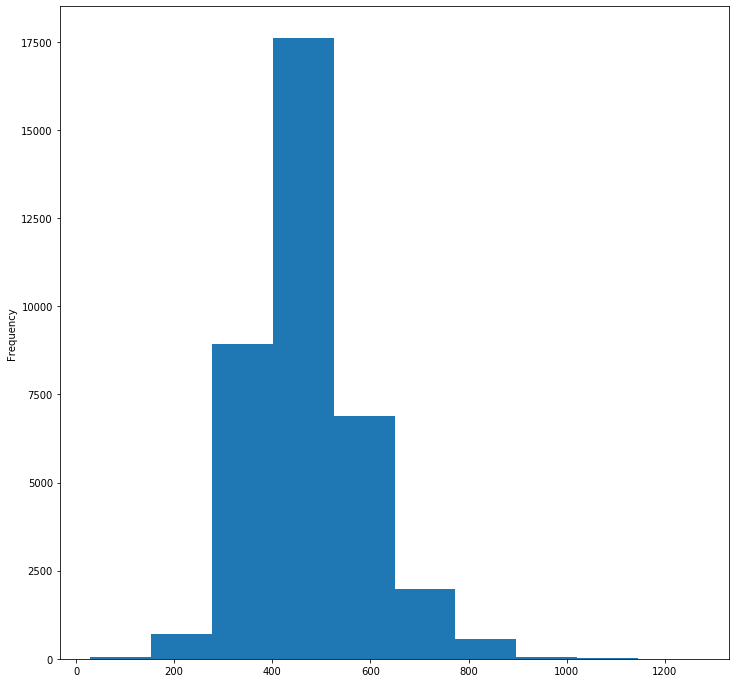

In [5]:
vehiculos["co2"].plot.hist()

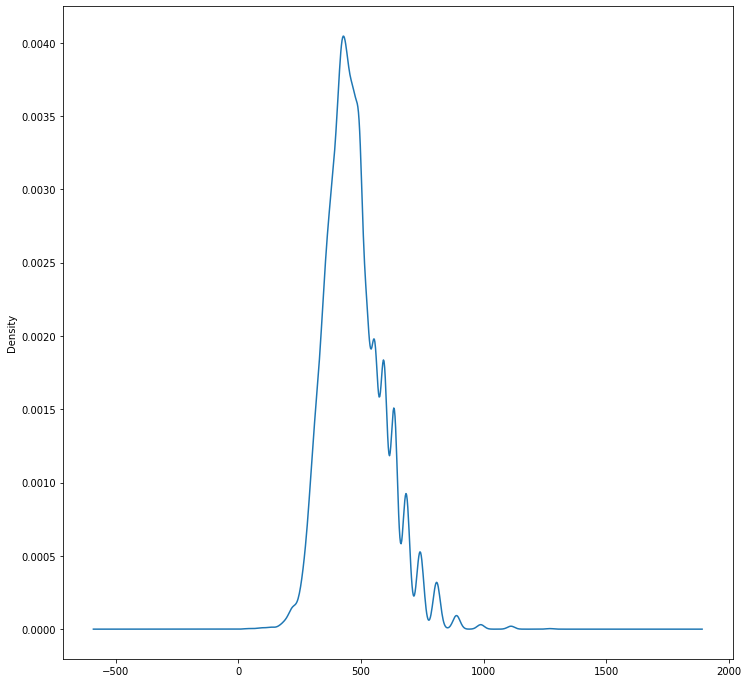

In [6]:
vehiculos.co2.plot.kde()
# produce un gráfico estimado de la función densidad de probabilidad de una población

In [7]:
def distribucion_variable_numerica(df,columna):
    df[columna].plot.kde()
    plt.xlabel("Distribución de la variable {}".format(columna))
    plt.show()

In [8]:
from ipywidgets import interact,fixed

In [9]:
interact(distribucion_variable_numerica,columna=vehiculos.select_dtypes(["int","float"]).columns, 
         df=fixed(vehiculos))

interactive(children=(Dropdown(description='columna', options=('year', 'desplazamiento', 'cilindros', 'consumo…

<function __main__.distribucion_variable_numerica(df, columna)>

In [10]:
vehiculos["cilindros"].value_counts(normalize=True)

4.0     0.381184
6.0     0.350767
8.0     0.220344
5.0     0.020115
12.0    0.015630
3.0     0.006252
10.0    0.004132
2.0     0.001359
16.0    0.000217
Name: cilindros, dtype: float64

Podemos saber si una variable sigue una distribución normal valiendonos de la libreria scipy.stats

In [11]:
from scipy import stats

In [12]:
columnas_numericas = vehiculos.select_dtypes(["int","float"]).columns
def normalidad_variable_numerica(columna):
    stats.probplot(vehiculos[columna], plot=plt)
    plt.xlabel("Diagrama de probabilidad (normal) de la variable {}".format(columna))
    plt.show()

In [13]:
interact(normalidad_variable_numerica,columna=columnas_numericas)

interactive(children=(Dropdown(description='columna', options=('year', 'desplazamiento', 'cilindros', 'consumo…

<function __main__.normalidad_variable_numerica(columna)>

### Test de normalidad
la gráfica da nociones sobre el comportamiento de la variable, sin embargo debemos hacer un test de normalidad para asegurar que la variable si sigue una distribución normal

In [14]:
for columna in columnas_numericas:
    a,pval = stats.normaltest(vehiculos[columna])
    if pval < 0.05:
        print("Columna {} no sigue una distribución normal".format(columna))

Columna year no sigue una distribución normal
Columna consumo no sigue una distribución normal
Columna co2 no sigue una distribución normal
Columna consumo_litros_milla no sigue una distribución normal


Con este test nos damos cuenta de que ninguna de las variables numericaa sigue una distribución normal.

## Distribución variables categóricas
una manera de ver como se distribuyen las variables categoricas es con pandas.value_counts().

In [15]:
def distribucion_variable_categorica(df,columna):
    df[columna].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [16]:
columnas_categoricas = vehiculos.select_dtypes(["object","category"]).columns

In [17]:
interact(distribucion_variable_categorica,df=fixed(vehiculos),columna=columnas_categoricas)

interactive(children=(Dropdown(description='columna', options=('fabricante', 'modelo', 'transmision', 'traccio…

<function __main__.distribucion_variable_categorica(df, columna)>